## 3-ая неделя Random Forest
<a href='https://towardsdatascience.com/exploratory-data-analysis-8fc1cb20fd15'>EDA</a>

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import log_loss, roc_auc_score, recall_score, precision_score, average_precision_score, f1_score, classification_report, accuracy_score, plot_roc_curve, plot_precision_recall_curve, ConfusionMatrixDisplay, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

In [103]:
titanic_train_data = pd.read_csv('https://raw.githubusercontent.com/betelgeus/study/master/data/titanic/train.csv')
titanic_train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [104]:
X = titanic_train_data.drop(['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin'], axis=1)
y = titanic_train_data['Survived']

In [105]:
X = pd.get_dummies(X)
X = X.fillna({'Age': X.Age.median()})

In [106]:
X.isnull().sum()

Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_female    0
Sex_male      0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [114]:
rs = np.random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = rs)

In [75]:
params = {'n_estimators': range(5, 25, 5), 'max_depth': range(1, 10), 'min_samples_split': range(5, 30, 5), 'min_samples_leaf': range(5, 30, 5)}

In [76]:
clf_rf = RandomForestClassifier()

In [77]:
best_clf_rs = GridSearchCV(clf_rf, params)

In [78]:
best_clf_rs.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': range(1, 10),
                         'min_samples_leaf': range(5, 30, 5),
                         'min_samples_split': range(5, 30, 5),
                         'n_estimators': range(5, 25, 5)})

In [79]:
best_clf_rs.best_params_

{'max_depth': 7,
 'min_samples_leaf': 5,
 'min_samples_split': 5,
 'n_estimators': 5}

In [80]:
predictions = best_clf_rs.predict(X_test)

/Users/mitya/venv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


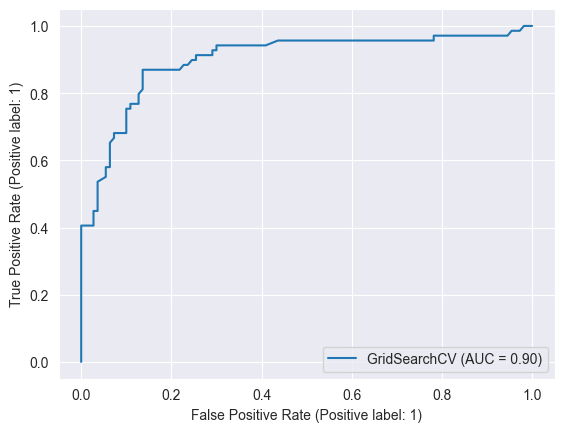

In [81]:
plot_roc_curve(best_clf_rs, X_test, y_test)
plt.show()

/Users/mitya/venv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


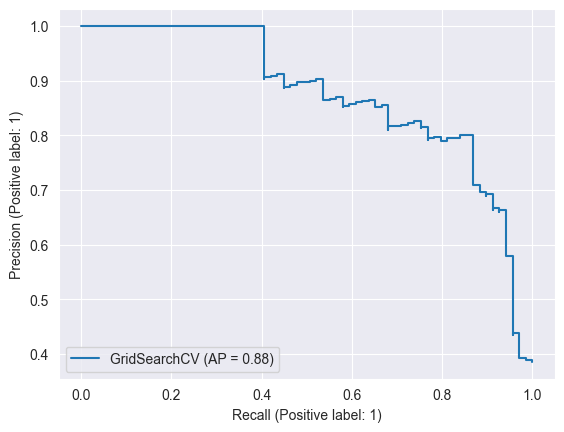

In [82]:
plot_precision_recall_curve(best_clf_rs, X_test, y_test)
plt.show()

In [83]:
test_prob = best_clf_rs.predict_proba(X_test)[:, 1]
test_pred = best_clf_rs.predict(X_test)

In [84]:
print('Log loss = {:.5f}'.format(log_loss(y_test, test_prob)))
print('AUC = {:.5f}'.format(roc_auc_score(y_test, test_prob)))
print('Average Precision = {:.5f}'.format(average_precision_score(y_test, test_prob)))
print('\nUsing 0.5 as threshold:')
print('Accuracy = {:.5f}'.format(accuracy_score(y_test, test_pred)))
print('Precision = {:.5f}'.format(precision_score(y_test, test_pred)))
print('Recall = {:.5f}'.format(recall_score(y_test, test_pred)))
print('F1 score = {:.5f}'.format(f1_score(y_test, test_pred)))

print('\nClassification Report')
print(classification_report(y_test, test_pred))

Log loss = 0.39150
AUC = 0.90007
Average Precision = 0.87571

Using 0.5 as threshold:
Accuracy = 0.83240
Precision = 0.85455
Recall = 0.68116
F1 score = 0.75806

Classification Report
              precision    recall  f1-score   support

           0       0.82      0.93      0.87       110
           1       0.85      0.68      0.76        69

    accuracy                           0.83       179
   macro avg       0.84      0.80      0.81       179
weighted avg       0.83      0.83      0.83       179



Confusion Matrix


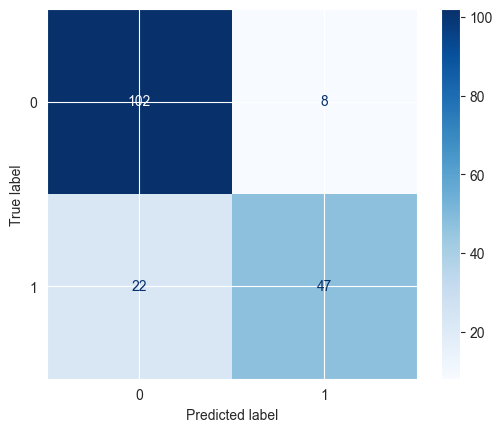

In [85]:
print('Confusion Matrix')
conf_matrix = confusion_matrix(y_test, test_pred)
disp = ConfusionMatrixDisplay(conf_matrix)
disp.plot(cmap=plt.cm.Blues, values_format='g')
plt.show()

### Задача
Разминочная задачка - создайте модель RandomForestClassifier с 15 деревьями и максимальной глубиной равной 5 уровням, поместите её в переменную rf. Обучите модель на данных x_train и y_train, предскажите класс для наблюдений в x_test и поместите его в переменную predictions.

In [87]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier(n_estimators=15, max_depth=5)
rf.fit(x_train, y_train)
predictions = rf.predict(x_test)

=====================

In [115]:
clf = DecisionTreeClassifier()

In [124]:
params = {'max_depth': range(1, 10), 'min_samples_split': range(5, 30, 5), 'min_samples_leaf': range(5, 30, 5)}

In [125]:
grid_search_cv_clf=GridSearchCV(clf, params, cv=5)

In [126]:
grid_search_cv_clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(1, 10),
                         'min_samples_leaf': range(5, 30, 5),
                         'min_samples_split': range(5, 30, 5)})

In [127]:
best_clf = grid_search_cv_clf.best_estimator_

In [128]:
best_clf.feature_importances_

array([0.17271515, 0.06032249, 0.07349258, 0.        , 0.05817563,
       0.63529417, 0.        , 0.        , 0.        , 0.        ])

In [129]:
feature_importance_df = pd.DataFrame({'features': list(X_train), 'importance': best_clf.feature_importances_})

In [130]:
feature_importance_df

,features,importance
0,Pclass,0.172715
1,Age,0.060322
2,SibSp,0.073493
3,Parch,0.000000
4,Fare,0.058176
5,Sex_female,0.635294
6,Sex_male,0.000000
7,Embarked_C,0.000000
8,Embarked_Q,0.000000
9,Embarked_S,0.000000


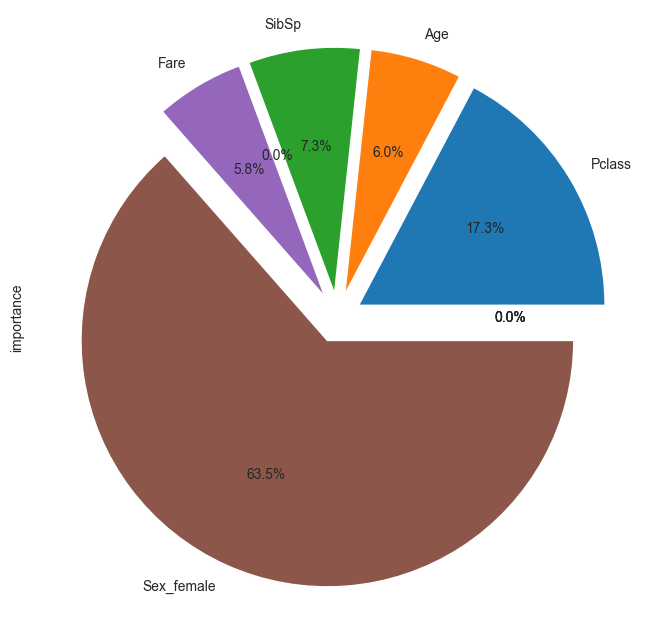

In [136]:
feature_importance_df.plot.pie(
                        explode=[0.1]*len(X_train.columns),
                        labels = feature_importance_df.features,
                        y = 'importance',
                        autopct='%1.1f%%',
                        shadow=False,
                        legend=False,
                        figsize=(8, 8));

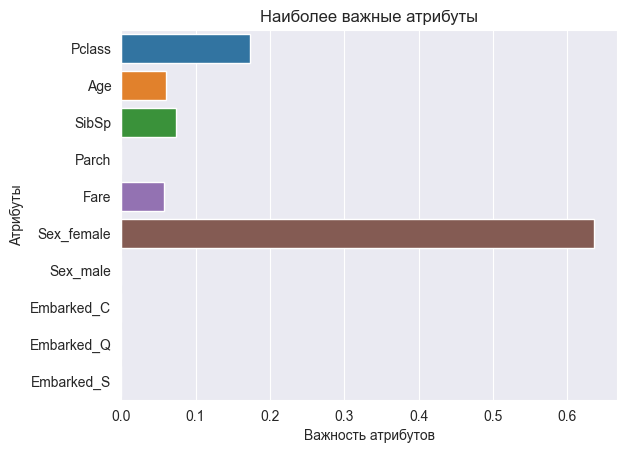

In [139]:
sns.barplot(y=feature_importance_df.features, x=feature_importance_df.importance)

plt.xlabel('Важность атрибутов')
plt.ylabel('Атрибуты')
plt.title("Наиболее важные атрибуты")
plt.show()

### Задача
Воспользуемся данными о сердечных заболеваниях и обучим на них Random Forest. Постройте график важности переменных для классификации и выберите среди предложенных вариантов наиболее похожий.

В задании присутствует рандом, прогоните обучение случайного леса и построение графика несколько раз, чтобы увидеть изменения в важности фичей (5 самых важных обычно присутствуют в топе, просто в разном порядке).
Чтобы получить такой же график, как в правильном варианте ответа, сделайте

np.random.seed(0)

rf = RandomForestClassifier(10, max_depth=5)

In [141]:
df = pd.read_csv('https://raw.githubusercontent.com/sanyathisside/Predicting-Heart-Disease-using-Machine-Learning/master/heart-disease.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [152]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [144]:
X = df.drop(['target'], axis=1)

In [145]:
y = df['target']

In [146]:
rs = np.random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = rs)

In [147]:
rf = RandomForestClassifier(10, max_depth=5)

In [151]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_estimators=10)

In [153]:
fi = rf.feature_importances_

In [160]:
fi_pd = pd.DataFrame({'features': list(X_train), 'importance': fi})

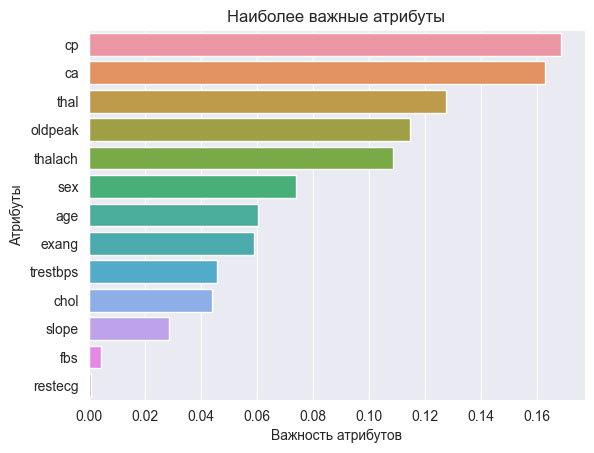

In [165]:
sns.barplot(y=fi_pd.features, x=fi_pd.importance, order=fi_pd.sort_values('importance', ascending=False).features)

plt.xlabel('Важность атрибутов')
plt.ylabel('Атрибуты')
plt.title("Наиболее важные атрибуты")
plt.show()

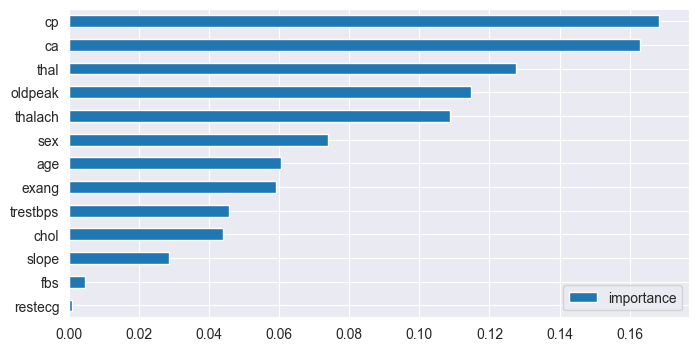

In [172]:
imp = pd.DataFrame(rf.feature_importances_, index=X_train.columns, columns=['importance'])
imp.sort_values('importance').plot(kind='barh', figsize=(8, 4))
plt.show()

### Нейронные сети

- <a href='https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.39892&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false'>Визуализация работы нейронной сети</a>
- <a href='https://medium.com/datathings/neural-networks-and-backpropagation-explained-in-a-simple-way-f540a3611f5e'>Объяснение обучения ANN</a>
- <a href='https://blog.goodaudience.com/artificial-neural-networks-explained-436fcf36e75'>Введение в ANN</a>
- <a href='https://medium.com/datadriveninvestor/neural-networks-explained-6e21c70d7818'>Краткий обзор некоторых видов сетей</a>
- <a href='https://towardsdatascience.com/intuitively-understanding-convolutions-for-deep-learning-1f6f42faee1'>Объяснение работы свёрточных нейронных сетей</a> (тех самых, которые используются для разделения картинок с людьми и солнышком от других)

### Практика

In [6]:
mushrooms_df = pd.read_csv('https://stepik.org/media/attachments/course/4852/training_mush.csv')
mushrooms_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6093 entries, 0 to 6092
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   cap-shape                 6093 non-null   int64
 1   cap-surface               6093 non-null   int64
 2   cap-color                 6093 non-null   int64
 3   bruises                   6093 non-null   int64
 4   odor                      6093 non-null   int64
 5   gill-attachment           6093 non-null   int64
 6   gill-spacing              6093 non-null   int64
 7   gill-size                 6093 non-null   int64
 8   gill-color                6093 non-null   int64
 9   stalk-shape               6093 non-null   int64
 10  stalk-root                6093 non-null   int64
 11  stalk-surface-above-ring  6093 non-null   int64
 12  stalk-surface-below-ring  6093 non-null   int64
 13  stalk-color-above-ring    6093 non-null   int64
 14  stalk-color-below-ring    6093 non-null 

In [8]:
mushrooms_df.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,2,0,3,1,5,1,0,0,9,1,...,3,7,0,2,1,4,3,5,0,0
1,2,0,4,0,5,1,0,1,10,0,...,7,4,0,2,1,0,7,4,0,1
2,2,0,3,0,2,1,0,0,7,0,...,0,4,0,2,1,2,1,5,1,1
3,0,0,3,0,5,1,1,0,2,0,...,7,7,0,2,2,4,7,3,1,0
4,2,3,3,1,5,1,0,0,10,1,...,3,6,0,2,1,4,2,5,0,0


### Задача
Переберите параметры с помощью GridSearchCV и обучите Random Forest на данных, указанных в предыдущем стэпе. Передайте в GridSearchCV модель с указанием random_state

RandomForestClassifier(random_state=0)
Параметры для выбора -

n_estimators: от 10 до 50 с шагом 10
max_depth: от 1 до 12 с шагом 2
min_samples_leaf: от 1 до 7
min_samples_split: от 2 до 9 с шагом 2
Укажите cv=3. Для ускорения расчётов в GridSearchCV можно указать n_jobs=-1, чтобы использовать все процессоры.

Какие параметры Random Forest были отобраны как наилучшие для решения на этих данных?

In [16]:
X = mushrooms_df.drop(['class'], axis=1)

In [17]:
y = mushrooms_df['class']

In [12]:
params = {'n_estimators': range(10, 51, 10), 'max_depth': range(1, 13, 2), 'min_samples_leaf': range(1, 8), 'min_samples_split': range(2, 10, 2)}

In [13]:
clf = RandomForestClassifier(random_state=0)

In [14]:
best_clf = GridSearchCV(clf, params, cv=3, n_jobs=-1)

In [21]:
best_clf.fit(X, y)

### Задача
Выберите правильные утверждения о важности фичей для нашего классификатора

In [23]:
best_est = best_clf.best_estimator_

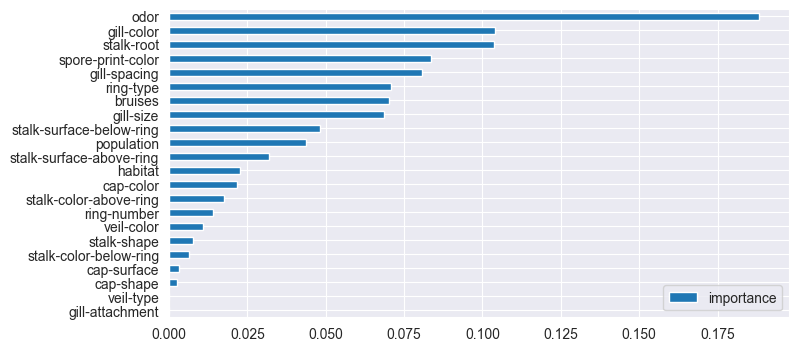

In [24]:
imp = pd.DataFrame(best_est.feature_importances_, index=X.columns, columns=['importance'])
imp.sort_values('importance').plot(kind='barh', figsize=(8, 4))
plt.show()

### Задача
Теперь у нас есть классификатор, определяющий какие грибы съедобные, а какие нет, испробуем его! Предскажите съедобность этих данных грибов и напишите в ответ число несъедобных грибов (класс равен 1).



Заметьте, что для использования этого леса на новых грибах, нам нужно будет заполнить значения параметров гриба, часть из которых определить проще (например, цвет шляпки), а для определения части понадобится специалист-миколог.
То есть в этом случае нам придётся самим экстрагировать признаки из объекта. Для зрительных признаков типа формы, цвета можно использовать более сложную модель (например, свёрточную нейронную сеть) и подавать на вход фотки гриба. И модель сама извлечёт признаки вместо того, чтобы нам описывать самим. Но одной фоткой тут не отделаешься - для определения запаха понадобится ещё детектор

In [25]:
mushrooms_test_df = pd.read_csv('https://stepik.org/media/attachments/course/4852/testing_mush.csv')

In [28]:
X_test = mushrooms_test_df

In [29]:
pred_y = best_clf.predict(X_test)

In [68]:
pd.Series(pred_y).value_counts()

0    1055
1     976
dtype: int64

### Задача
Создайте confusion matrix по предсказаниям, полученным вами в прошлом уроке и правильным ответам, (воспользуйтесь паролем из предыдущего задания, чтобы открыть их). Выберите из предложенных вариантов правильный

In [39]:
mushrooms_class_df = pd.read_csv('/Users/mitya/Downloads/testing_y_mush.csv')
mushrooms_class_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2031 entries, 0 to 2030
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   class   2031 non-null   int64
dtypes: int64(1)
memory usage: 16.0 KB


In [40]:
y_test = mushrooms_class_df

Confusion Matrix


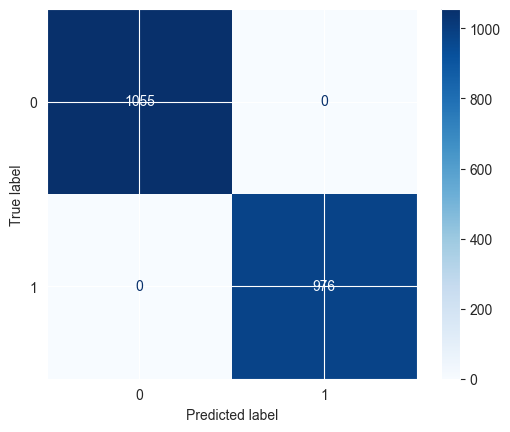

In [42]:
print('Confusion Matrix')
conf_matrix = confusion_matrix(y_test, pred_y)
disp = ConfusionMatrixDisplay(conf_matrix)
disp.plot(cmap=plt.cm.Blues, values_format='g')
plt.show()

### Задача
Перейдём к следующему датасэту.

На Землю нападают войска жукеров, и в их флоте присутствуют транспортники, истребители и крейсеры. Для борьбы с каждым типом кораблей используется свой вид оружия. Как аналитику из Штаба Обороны, вам поручено разработать модель, предсказывающую какие корабли участвуют в атаке, чтобы успешно отбить нападения на различные области планеты

Данных удалось собрать немного, и предсказывать придётся гораздо больший по объёму массив.

Обучите модель и предскажите классы кораблей для новых поступающих данных. Укажите в ответе через пробел число крейсеров, транспортников и истребителей.

От вашего ответа зависит судьба человечества!

In [43]:
bugs_train_df = pd.read_csv('https://stepik.org/media/attachments/course/4852/invasion.csv')
bugs_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   class               500 non-null    object 
 1   g_reflection        500 non-null    float64
 2   i_reflection        500 non-null    float64
 3   speed               500 non-null    float64
 4   brightness          500 non-null    float64
 5   time_of_observance  500 non-null    int64  
 6   volume              500 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 27.5+ KB


In [46]:
bugs_train_df['class'].unique()

array(['transport', 'fighter', 'cruiser'], dtype=object)

In [48]:
bugs_train_df['class'] = bugs_train_df['class'].map({'transport': 0, 'fighter': 1, 'cruiser': 2})

In [49]:
bugs_train_df['class'].unique()

array([0, 1, 2])

In [51]:
X_train = bugs_train_df.drop(['class'], axis=True)

In [52]:
y_train = bugs_train_df['class']

In [53]:
clf = DecisionTreeClassifier()

In [54]:
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [55]:
bugs_test_df = pd.read_csv('https://stepik.org/media/attachments/course/4852/operative_information.csv')
bugs_test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   g_reflection        1500 non-null   float64
 1   i_reflection        1500 non-null   float64
 2   speed               1500 non-null   float64
 3   brightness          1500 non-null   float64
 4   time_of_observance  1500 non-null   int64  
 5   volume              1500 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 70.4 KB


In [56]:
X_test = bugs_test_df

In [57]:
y_pred = clf.predict(X_test)

In [58]:
y_pred = pd.Series(y_pred)

In [65]:
y_pred = y_pred.map({0: 'transport', 1: 'fighter', 2: 'cruiser'})

In [66]:
y_pred.value_counts()

fighter      675
transport    595
cruiser      230
dtype: int64

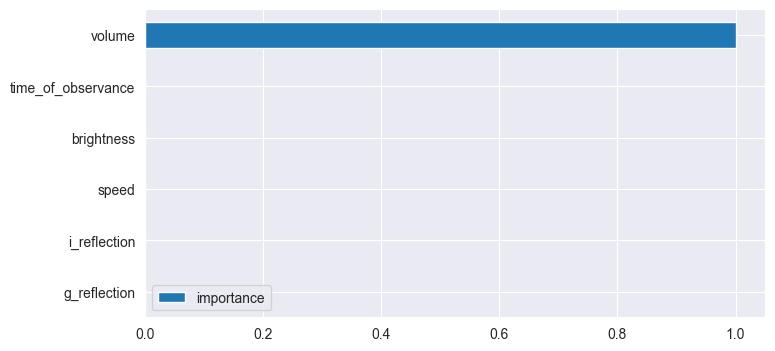

In [69]:
imp = pd.DataFrame(clf.feature_importances_, index=X_test.columns, columns=['importance'])
imp.sort_values('importance').plot(kind='barh', figsize=(8, 4))
plt.show()

### Задача
Благодаря вашим стараниям войска захватчиков были разгромлены, но война ещё не окончена! Вас повысили и перевели на новое направление (новые должности - новые задачи) - теперь нужно выявлять опасные регионы космоса, где могут находиться жукеры.

Проанализируйте имеющиеся данные об опасности разных регионов космоса и укажите наиболее вероятные причины угрозы

In [70]:
space_dangers_df = pd.read_csv('https://stepik.org/media/attachments/course/4852/space_can_be_a_dangerous_place.csv')
space_dangers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   r                          100000 non-null  float64
 1   phi                        100000 non-null  float64
 2   peradventure_index         100000 non-null  float64
 3   dustiness                  100000 non-null  float64
 4   black_hole_is_near         100000 non-null  int64  
 5   buggers_were_noticed       100000 non-null  int64  
 6   nearby_system_has_planemo  100000 non-null  int64  
 7   dangerous                  100000 non-null  int64  
dtypes: float64(4), int64(4)
memory usage: 6.1 MB


In [71]:
space_dangers_df.head()

,r,phi,peradventure_index,dustiness,black_hole_is_near,buggers_were_noticed,nearby_system_has_planemo,dangerous
0,169.1,138.0,22.3212,0.706285,0,1,1,1
1,11.1,148.0,1.4652,-0.410512,1,1,1,1
2,274.6,201.0,36.2472,0.756457,1,1,1,1
3,172.8,173.0,22.8096,0.035221,1,1,1,1
4,223.3,222.0,29.4756,0.197271,0,1,1,1


In [72]:
space_dangers_df.dangerous.value_counts()

1    90202
0     9798
Name: dangerous, dtype: int64

In [73]:
X_train = space_dangers_df.drop(['dangerous'], axis=1)

In [74]:
y_train = space_dangers_df['dangerous']

In [75]:
clf = RandomForestClassifier()

In [77]:
clf.fit(X_train, y_train)

RandomForestClassifier()

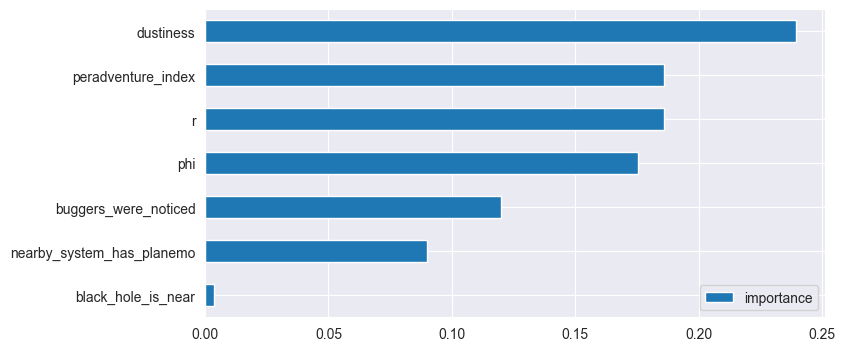

In [78]:
imp = pd.DataFrame(clf.feature_importances_, index=X_train.columns, columns=['importance'])
imp.sort_values('importance').plot(kind='barh', figsize=(8, 4))
plt.show()